In [1]:
import pandas as pd
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [147]:
#data = pd.read_csv('txt/(251).txt', sep="\t", header=30,skipfooter=152,engine='python')
data = pd.read_csv('txt/_(256).txt', sep="\t", header=30,skipfooter=152,engine='python')  #257 good #256 bad
data.columns=['Slice','Line','X [mm]','Y [mm]','Z [mm]','Rotation [deg]','Bx [mT]','By [mT]','Bz [mT]','Rot. Enc [steps]',
              'Bxy [mT]','Btot [mT]','Angle error [deg]','Direction','R [mm]','Z [mm]','Theta [deg]','Probe temp [°C]']
data['degz_xyplane (deg)']=np.arccos(data['Bxy [mT]']/data['Btot [mT]'])*180/np.pi
data.head()

,Slice,Line,X [mm],Y [mm],Z [mm],Rotation [deg],Bx [mT],By [mT],Bz [mT],Rot. Enc [steps],Bxy [mT],Btot [mT],Angle error [deg],Direction,R [mm],Z [mm],Theta [deg],Probe temp [°C],degz_xyplane (deg)
0,1.0,1.0,-9.626,0.001,-25.764,0.0,556.910,0.287,25.118,-245760.000,556.910,557.476,NaN,R+,9.626,-25.764,0.0,22.225,2.582079
1,1.0,1.0,-9.626,0.001,-25.764,0.1,557.124,0.681,25.114,-245764.551,557.125,557.691,NaN,R+,9.626,-25.764,0.1,22.229,2.581581
2,1.0,1.0,-9.626,0.001,-25.764,0.2,556.890,1.165,25.170,-245769.102,556.891,557.459,NaN,R+,9.626,-25.764,0.2,22.225,2.586677
3,1.0,1.0,-9.626,0.001,-25.764,0.3,556.992,1.462,25.023,-245773.653,556.994,557.556,NaN,R+,9.626,-25.764,0.3,22.234,2.572753
4,1.0,1.0,-9.626,0.001,-25.764,0.4,556.942,1.766,25.129,-245778.204,556.945,557.512,NaN,R+,9.626,-25.764,0.4,22.234,2.584276


In [148]:
len(data)/3

3601.0

In [149]:
data_slice1_df=data.iloc[0:int(len(data)/3)].copy(deep=False).reset_index(drop=True)
print(data_slice1_df['Slice'].value_counts())
data_slice2_df=data.iloc[int(len(data)/3):2*int(len(data)/3)].copy(deep=False).reset_index(drop=True)
print(data_slice2_df['Slice'].value_counts())
data_slice3_df=data.iloc[2*int(len(data)/3):int(len(data))].copy(deep=False).reset_index(drop=True)
print(data_slice3_df['Slice'].value_counts())

1.0    3601
Name: Slice, dtype: int64
2.0    3601
Name: Slice, dtype: int64
3.0    3601
Name: Slice, dtype: int64


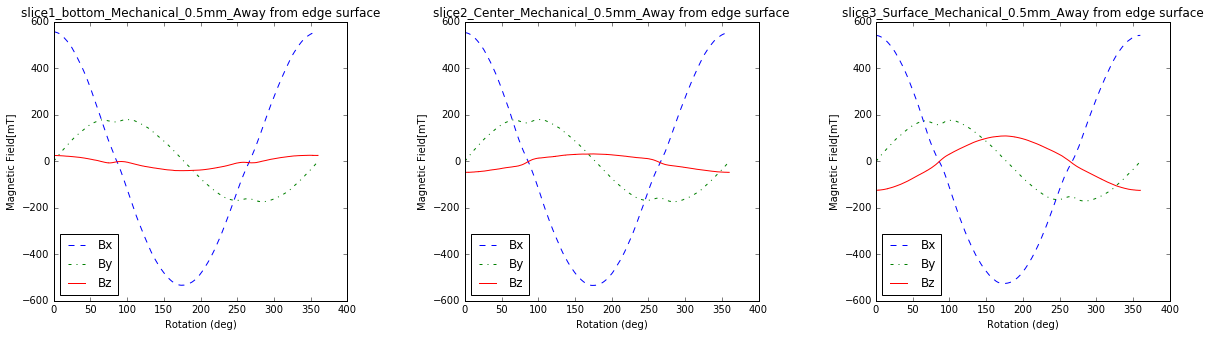

In [150]:
#fig, axarr = plt.subplots(1,3, sharex='col',figsize=(10,4))
#fig.tight_layout()
#fig.tight_layout(pad=1.5, h_pad=1.2, w_pad=1.2, rect=None)
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace = 0.3,wspace = 0.4)
plt.subplot(131)
plt.plot(data_slice1_df['Rotation [deg]'],data_slice1_df['Bx [mT]'],'--',
         data_slice1_df['Rotation [deg]'],data_slice1_df['By [mT]'],'-.',
         data_slice1_df['Rotation [deg]'],data_slice1_df['Bz [mT]'],'-',label='line 1')
plt.ylabel('Magnetic Field[mT]')
plt.xlabel('Rotation (deg)')
plt.legend(['Bx','By','Bz'],loc='best')
plt.title("slice1_bottom_Mechanical_0.5mm_Away from edge surface")

plt.subplot(132)
plt.plot(data_slice2_df['Rotation [deg]'],data_slice2_df['Bx [mT]'],'--',
         data_slice2_df['Rotation [deg]'],data_slice2_df['By [mT]'],'-.',
         data_slice2_df['Rotation [deg]'],data_slice2_df['Bz [mT]'],'-',label='line 2')
plt.ylabel('Magnetic Field[mT]')
plt.xlabel('Rotation (deg)')
plt.legend(['Bx','By','Bz'],loc='best')
plt.title("slice2_Center_Mechanical_0.5mm_Away from edge surface")

plt.subplot(133)
plt.plot(data_slice3_df['Rotation [deg]'],data_slice3_df['Bx [mT]'],'--',
         data_slice3_df['Rotation [deg]'],data_slice3_df['By [mT]'],'-.',
         data_slice3_df['Rotation [deg]'],data_slice3_df['Bz [mT]'],'-',label='line 3')
plt.ylabel('Magnetic Field[mT]')
plt.xlabel('Rotation (deg)')
plt.legend(['Bx','By','Bz'],loc='best')
plt.title("slice3_Surface_Mechanical_0.5mm_Away from edge surface")

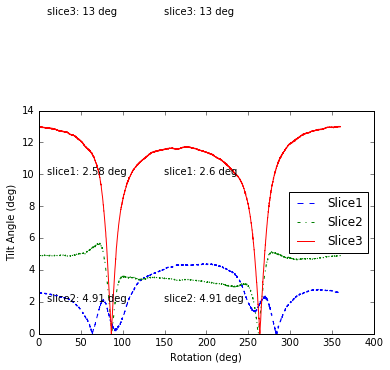

In [151]:
plt.plot(data_slice1_df['Rotation [deg]'],data_slice1_df['degz_xyplane (deg)'],'--',
         data_slice2_df['Rotation [deg]'],data_slice2_df['degz_xyplane (deg)'],'-.',
         data_slice3_df['Rotation [deg]'],data_slice3_df['degz_xyplane (deg)'],'-',label='line 1')
plt.ylabel('Tilt Angle (deg)')
plt.xlabel('Rotation (deg)')
plt.legend(['Slice1','Slice2','Slice3'],loc='best')
plt.text(10, 10,'slice1: '+str(format(data_slice1_df['degz_xyplane (deg)'][0],'.3g'))+' deg')
plt.text(10, 2,'slice2: '+str(format(data_slice2_df['degz_xyplane (deg)'][0],'.3g'))+' deg')
plt.text(10, 20,'slice3: '+str(format(data_slice3_df['degz_xyplane (deg)'][0],'.3g'))+' deg')

plt.text(150, 10,'slice1: '+str(format(data_slice1_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')
plt.text(150, 2,'slice2: '+str(format(data_slice2_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')
plt.text(150, 20,'slice3: '+str(format(data_slice3_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')



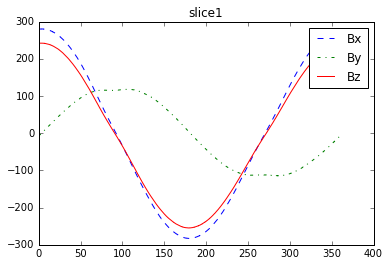

In [58]:
plt.plot(data_slice1_df['Rotation [deg]'],data_slice1_df['Bx [mT]'],'--',
         data_slice1_df['Rotation [deg]'],data_slice1_df['By [mT]'],'-.',
         data_slice1_df['Rotation [deg]'],data_slice1_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice1")

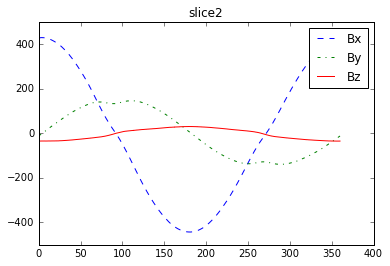

In [59]:
plt.plot(data_slice2_df['Rotation [deg]'],data_slice2_df['Bx [mT]'],'--',
         data_slice2_df['Rotation [deg]'],data_slice2_df['By [mT]'],'-.',
         data_slice2_df['Rotation [deg]'],data_slice2_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice2")

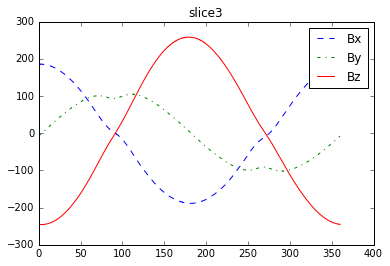

In [60]:
plt.plot(data_slice3_df['Rotation [deg]'],data_slice3_df['Bx [mT]'],'--',
         data_slice3_df['Rotation [deg]'],data_slice3_df['By [mT]'],'-.',
         data_slice3_df['Rotation [deg]'],data_slice3_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice3")